# Task 1: Web scraping and gain company insights

## Import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


pd.options.display.float_format = '{:15.2f}'.format

## Web scraping from the third-party reviews provider.

In [2]:
## Set up the base url of the website we want to scrap
## Set the number of webpages we want to extract reviews from, as well as the amount of reviews we want to scrap from each webpage
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 25
page_size = 100

reviews = []
rating = []
date = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = base_url + "/page/{}/?sortby=post_date%3ADesc&pagesize={}".format(i, page_size)

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Obtain reviews
    for x in parsed_content.find_all("div", {"class": "text_content"}): ## This class is the one containing the review
        reviews.append(x.get_text())

    # Obtain ratings
    for x in parsed_content.find_all("span",{"itemprop":"ratingValue"}): ## This class is the one containing the rating
        if len(x.get_text()) <= 2:
            rating.append(x.get_text())

    # Obtain dates
    for x in parsed_content.find_all("time",{"itemprop":"datePublished"}): ## This class is the one containing the date
        date.append(x.get_text())

    print("   ---> {} total reviews".format(len(reviews)))
    print("   ---> {} total ratings".format(len(rating)))
    print("   ---> {} total dates".format(len(date)))

Scraping page 1
   ---> 100 total reviews
   ---> 100 total ratings
   ---> 100 total dates
Scraping page 2
   ---> 200 total reviews
   ---> 200 total ratings
   ---> 200 total dates
Scraping page 3
   ---> 300 total reviews
   ---> 300 total ratings
   ---> 300 total dates
Scraping page 4
   ---> 400 total reviews
   ---> 400 total ratings
   ---> 400 total dates
Scraping page 5
   ---> 500 total reviews
   ---> 500 total ratings
   ---> 500 total dates
Scraping page 6
   ---> 600 total reviews
   ---> 600 total ratings
   ---> 600 total dates
Scraping page 7
   ---> 700 total reviews
   ---> 700 total ratings
   ---> 700 total dates
Scraping page 8
   ---> 800 total reviews
   ---> 800 total ratings
   ---> 800 total dates
Scraping page 9
   ---> 900 total reviews
   ---> 900 total ratings
   ---> 900 total dates
Scraping page 10
   ---> 1000 total reviews
   ---> 1000 total ratings
   ---> 1000 total dates
Scraping page 11
   ---> 1100 total reviews
   ---> 1100 total ratings
   --

In [3]:
# Modify dataset
df = pd.DataFrame({"date":date,"rating":rating,"reviews":reviews}).astype(dtype={"rating":"int32"})
df["date"] = pd.to_datetime(df["date"])
df.set_index(df["date"], inplace=True)
df.drop(columns="date", inplace=True)

df["reviews"] = df["reviews"].apply(lambda x: x.split("| ")[1] if len(x.split("| ")) == 2 else "0") ## Filter reviews that have actual content from those who have not
df = df[df["reviews"] != "0"] ## Filter the ones that have actual content

df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2023-05-08 to 2016-03-23
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   2013 non-null   int32 
 1   reviews  2013 non-null   object
dtypes: int32(1), object(1)
memory usage: 39.3+ KB


,rating,reviews
date,,
2023-05-08,1,I will never travel with British Airways agai...
2023-05-06,1,I am already in Portugal so contacted them to...
2023-05-06,1,Terrible. Avoid this airline. It’s now becomi...
2023-05-01,2,"Despite being a gold member, the British Airw..."
2023-04-28,5,Regarding the aircraft and seat: The business ...
...,...,...
2016-03-26,3,Istanbul to London Heathrow with British Airw...
2016-03-25,8,London Heathrow to Houston on British Airways...
2016-03-24,1,We have flown with British Airways over 100 t...


Let's decompose the date feature into year, month, week and day components.

In [4]:
def date_components(df):
    year = df.index.year
    month = df.index.month
    week = df.index.week
    day = df.index.day

    return pd.DataFrame({"year":year,"month":month,"week":week,"day":day})


df = pd.concat([df.reset_index(),date_components(df)], axis=1).set_index("date")
df

C:\Users\Luis\AppData\Local\Temp/ipykernel_17740/1150482917.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  week = df.index.week


,rating,reviews,year,month,week,day
date,,,,,,
2023-05-08,1,I will never travel with British Airways agai...,2023,5,19,8
2023-05-06,1,I am already in Portugal so contacted them to...,2023,5,18,6
2023-05-06,1,Terrible. Avoid this airline. It’s now becomi...,2023,5,18,6
2023-05-01,2,"Despite being a gold member, the British Airw...",2023,5,18,1
2023-04-28,5,Regarding the aircraft and seat: The business ...,2023,4,17,28
...,...,...,...,...,...,...
2016-03-26,3,Istanbul to London Heathrow with British Airw...,2016,3,12,26
2016-03-25,8,London Heathrow to Houston on British Airways...,2016,3,12,25
2016-03-24,1,We have flown with British Airways over 100 t...,2016,3,12,24


## Answering seed questions

- What is the mean rating for the airline during the last 3 years?

The mean rating for British Airways is: 4.2


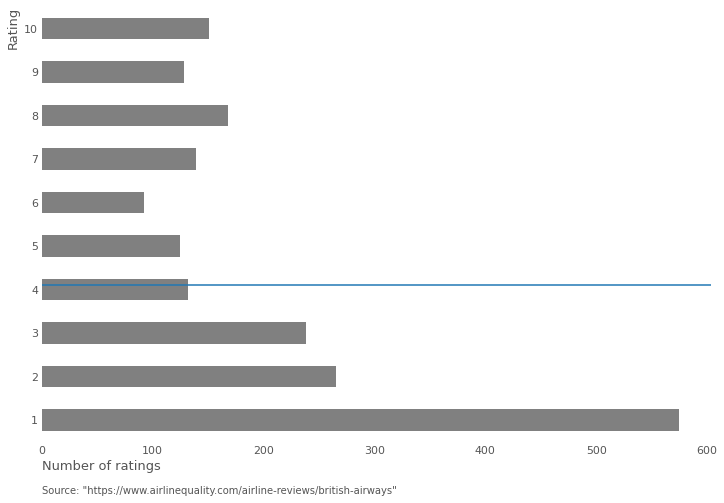

In [6]:
g = df.groupby("rating").count().plot(kind="barh", figsize=(12,8), legend=False, color="gray");
plt.xticks(size=11, color="#555555")
plt.yticks(size=11, color="#555555")
plt.ylabel("Rating", size=13, color="#555555", loc="top")
plt.xlabel("Number of ratings", size=13, color="#555555", loc="left")
# plt.axhline(5-1, ls="-", color="k")
plt.axhline(4.1-1, ls="-")
# # plt.legend("")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tick_params(axis='both', which='both', length=0, width=0, color='none')

g.annotate('Source: "https://www.airlinequality.com/airline-reviews/british-airways"',
            xy = (0, -0.12),
            xycoords='axes fraction',
            fontsize=10,
            color="#555555")

print("The mean rating for British Airways is:",df["rating"].mean().round(1))

- Is there any yearly trend in ratings?

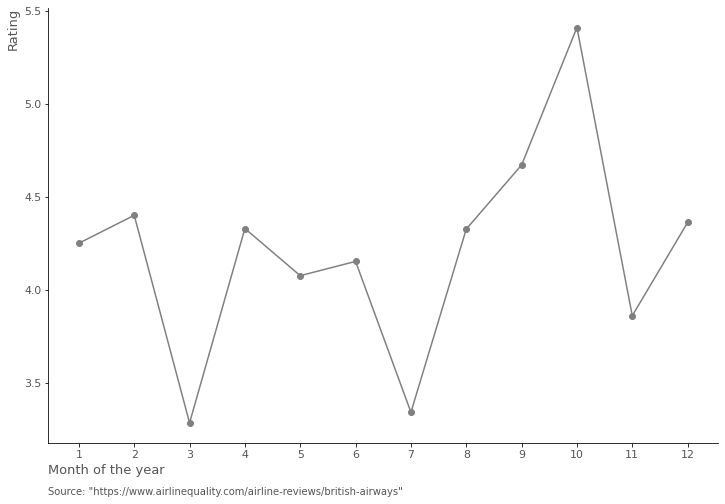

In [8]:
g = df.loc["2017":"2022",:].groupby(["month","year"])["rating"].mean().unstack(level=0).mean().plot(figsize=(12,8), marker="o", color="gray");

plt.xticks(size=11, color="#555555")
plt.yticks(size=11, color="#555555")
plt.ylabel("Rating", size=13, color="#555555", loc="top")
plt.xlabel("Month of the year", size=13, color="#555555", loc="left")
# plt.ylim([1,6])
g.set_xticks(range(1,13))


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
g.annotate('Source: "https://www.airlinequality.com/airline-reviews/british-airways"',
            xy = (0, -0.12),
            xycoords='axes fraction',
            fontsize=10,
            color="#555555");

The worst ratings are obtained during the months are March, July and November.

- What are the main topics customers complain about on the worst months?

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Take the months with the worst reviews
temp1 = df[(df["month"] == 3) | (df["month"] == 7) | (df["month"]  == 11)]

# Load the stop words list to avoid using non-relevant words
stop_words = pd.read_csv("stop_words_english.txt", header=None, names=["word_list"])

# Instantiate
cv = CountVectorizer(strip_accents = 'unicode',
                     stop_words = stop_words["word_list"].to_list(),
                     max_df = 0.7,
                     min_df = 50,
                     ngram_range = (1,3))

# Fit
cv.fit(temp1["reviews"])

# Transform
cv.transform(temp1["reviews"])

temp = pd.DataFrame(cv.vocabulary_, index=[0]).T
temp[0].sort_values(ascending=False)[:50]

C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'airway', 'airways', 'british', 'daren', 'hadn', 'herse', 'himse', 'itse', 'mayn', 'mightn', 'mon', 'mustn', 'myse', 'needn', 'oughtn', 'shan'] not in stop_words.
  warnings.warn(


told                62
time                61
staff               60
service             59
served              58
seats               57
seat                56
return              55
premium             54
poor                53
plane               52
people              51
pay                 50
passengers          49
paid                48
offered             47
minutes             46
meal                45
lounge              44
london heathrow     43
london              42
left                41
hours               40
hour                39
heathrow            38
gatwick             37
friendly            36
food                35
flying              34
fly                 33
flights             32
flew                31
extra               30
experience          29
entertainment       28
economy             27
drinks              26
drink               25
delayed             24
customer service    23
customer            22
crew                21
cost                20
club       

The most repeated topics are time, provided service (from staff), in-flight seats and meals and premium services.

We can also check that from a Word Cloud.

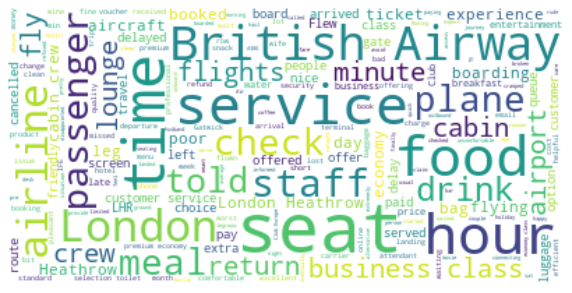

In [35]:
from wordcloud import WordCloud

# Take the months with the worst reviews
temp = df[(df["month"] == 3) | (df["month"] == 7) | (df["month"]  == 11)]

# Combine all reviews into a single string
text = " ".join(review for review in temp['reviews'])

# Load the stop words list to avoid using non-relevant words
stop_words = pd.read_csv("stop_words_english.txt", header=None, names=["word_list"])

# Create word cloud
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white", stopwords=stop_words["word_list"].to_list()).generate(text)

# Plot word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can take the 5 most repeated words from the Word Cloud and plot their frequency of appearance in the reviews.

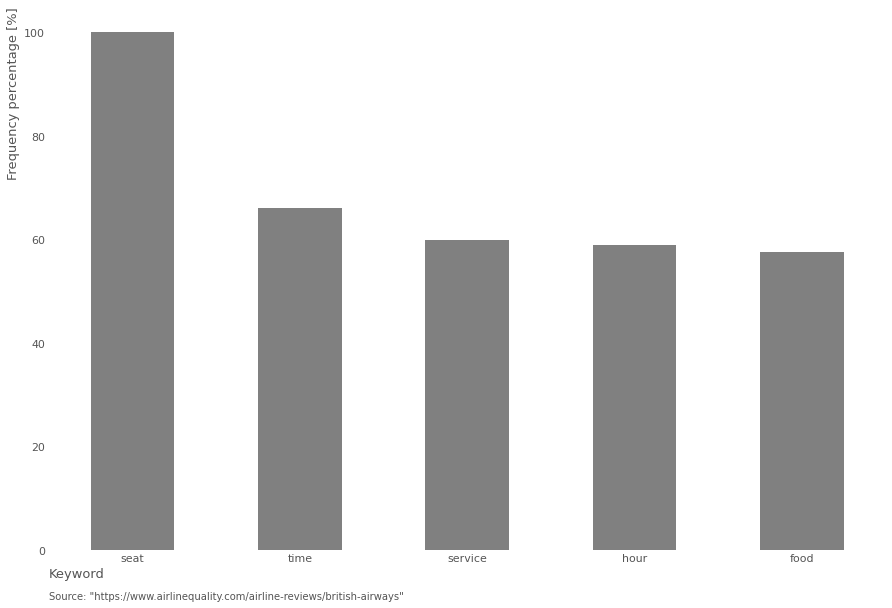

In [39]:
temp = pd.DataFrame(wordcloud.words_, index=[0]).T
g = (temp[0][:5]*100).sort_values(ascending=False).plot(kind="bar", figsize=(15,10), legend=False, color="gray", rot=0)
plt.xticks(size=11, color="#555555")
plt.yticks(size=11, color="#555555")
plt.ylabel("Frequency percentage [%]", size=13, color="#555555", loc="top")
plt.xlabel("Keyword", size=13, color="#555555", loc="left")
# plt.xlim([0,100])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tick_params(axis='both', which='both', length=0, width=0, color='none')

g.annotate('Source: "https://www.airlinequality.com/airline-reviews/british-airways"',
            xy = (0, -0.09),
            xycoords='axes fraction',
            fontsize=10,
            color="#555555");

### The final summary is in the PowerPoint presentation under the name "Task 1 Analysis Summary.pptx"